In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno


In [2]:
data=pd.read_csv(r"C:\Users\VISHESH\OneDrive\Desktop\SKS ANALYSIS\Telco_Customer_Churn_Dataset .csv")

In [3]:
print("Total column and Row are ",data.shape)


Total column and Row are  (7043, 21)


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Manipulation

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Dropping Unwanted Columns 
data= data.drop(['customerID'], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#TotalCharges column datatype is object so we are converting it into numeric datatype
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')


In [10]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#Checking TotalCharge 
data[np.isnan(data['TotalCharges'])]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
#Filling with the mean values of Totalcharge
data.fillna(data["TotalCharges"].mean())


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
#Checking MonthlyCharges
print(data[np.isnan(data['MonthlyCharges'])].index)
print(data[data['MonthlyCharges'] == 0].index)



Index([], dtype='int64')
Index([], dtype='int64')


In [14]:
#Tensure
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)
data [data['tenure'] == 0].index

Index([], dtype='int64')

In [15]:
#Checking after the updating the data
data.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:

data["SeniorCitizen"]= data["SeniorCitizen"].map({0: "No", 1: "Yes"})


In [18]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Data Visualization


In [20]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


1. Customer Distribution & Churn Rate

In [21]:
# Graph of Gender Distribution &&&& Graph of Churn Distribution
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.81, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [22]:
#Churn Distribution by gender
fig = px.histogram(data, x="gender", color="Churn", barmode="group",
             title="<b>Churn Distribution by Gender</b>",
             labels={"gender": "Gender", "count": "Count"},
               # Dark Red & Dark Blue
             text_auto=True)  # Adds value labels

# Update layout for a cleaner look
fig.show()

In [23]:
#Churn distribuation by Senior Citizen

color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

2. Tenure & Churn 

In [24]:


# Tenure Distribution  by Contract Type 
fig = px.histogram(data, x="tenure", color="Contract", barmode="group",
                   title="<b>Customer Tenure Distribution by Contract Type</b>",
                   labels={"tenure": "Tenure (Months)", "count": "Count"},
                   color_discrete_map={"Month-to-month": "red", "One year": "blue", "Two year": "green"})

fig.update_layout(
    width=1400, 
    height=700, 
    bargap=0.1, 
    xaxis_title="Tenure (Months)", 
    yaxis_title="Count",
    font=dict(size=14)  
)
fig.show()


 3.Service-Related Insights

In [25]:
#Internet Service & Churn

fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [26]:
#Churn Distribution by Contract
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer Contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

4. Billing & Payment Analysis


In [27]:
#Payment Method Distribution
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [28]:
#Customer Payment Method distribution w.r.t. Churn
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [29]:
churn_yes = data[data["Churn"] == "Yes"]["MonthlyCharges"]
churn_no = data[data["Churn"] == "No"]["MonthlyCharges"]

# Create KDE plot (Density Plot)
fig = ff.create_distplot(
    [churn_no, churn_yes],  # Data for KDE plot
    group_labels=["Not Churn (Red)", "Churn (Blue)"],  # Labels for legend
    colors=["#FF0000", "#0000FF"],  # Red for Not Churn, Blue for Churn
    show_hist=False,  # Hide histogram bars
    show_rug=False  # Hide rug plot
)

# Update layout for better visualization
fig.update_layout(
    title="<b>Distribution of Monthly Charges by Churn</b>",
    plot_bgcolor="white",
    title_font_size=18,
    font=dict(family="Arial", size=14),
    legend_title="Churn Status"
)

# Update X and Y axis labels with gridlines
fig.update_xaxes(
    title_text="Monthly Charges (USD)", 
    showgrid=True, gridwidth=0.5, gridcolor="gray"
)
fig.update_yaxes(
    title_text="Density", 
    showgrid=True, gridwidth=0.5, gridcolor="gray"
)

# Show the plot
fig.show()

In [30]:

# Create a new column for Yearly Charges
data["YearlyCharges"] = data["MonthlyCharges"] * 12

# Filter Yearly Charges data based on Churn status
churn_yes = data[data["Churn"] == "Yes"]["YearlyCharges"]
churn_no = data[data["Churn"] == "No"]["YearlyCharges"]

# Create KDE plot (Density Plot)
fig = ff.create_distplot(
    [churn_no, churn_yes],  # Data for KDE plot
    group_labels=["Not Churn (Dark Red)", "Churn (Dark Blue)"],  # Labels for legend
    colors=["#8B0000", "#00008B"],  # Dark Red for Not Churn, Dark Blue for Churn
    show_hist=False,  # Hide histogram bars
    show_rug=False  # Hide rug plot
)

# Update layout for better visualization
fig.update_layout(
    title="<b>Distribution of Yearly Charges by Churn</b>",
    plot_bgcolor="white",
    title_font_size=18,
    font=dict(family="Arial", size=14),
    legend_title="Churn Status"
)

# Update X and Y axis labels with gridlines
fig.update_xaxes(
    title_text="Yearly Charges (USD)", 
    showgrid=True, gridwidth=0.5, gridcolor="gray"
)
fig.update_yaxes(
    title_text="Density", 
    showgrid=True, gridwidth=0.5, gridcolor="gray"
)

# Show the plot
fig.show()


5. Relation Between Tenure and Churn

In [31]:
#Distribution of Tenure by Churn
fig = px.histogram(data, x="tenure", color="Churn",
                   title="<b>Distribution of Tenure by Churn</b>",
                   labels={"tenure": "Tenure (Months)", "count": "Customer Count"},
                   nbins=30, barmode="group",  # "group" instead of "overlay" to avoid overlap
                   color_discrete_map={"Yes": "Green", "No": "Red"})

# Update Layout
fig.update_layout(
    width=1000, height=600,  # Increase size
    xaxis_title="Tenure (Months)",
    yaxis_title="Count of Customers",
    bargap=0.2  # Adjust gap between bars
)

# Show Plot
fig.show()

In [32]:
# Count the number of customers for each tenure grouped by Churn
churn_yes = data[data["Churn"] == "Yes"].groupby("tenure").size()
churn_no = data[data["Churn"] == "No"].groupby("tenure").size()

# Create an Area Chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=churn_no.index, y=churn_no.values,
    mode='lines', fill='tozeroy',
    name='Not Churned', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=churn_yes.index, y=churn_yes.values,
    mode='lines', fill='tozeroy',
    name='Churned', line=dict(color='red')
))

# Update Layout
fig.update_layout(
    title="<b>Tenure Distribution by Churn (Area Chart)</b>",
    xaxis_title="Tenure (Months)",
    yaxis_title="Number of Customers",
    width=1000, height=600,  # Increase size
    template="plotly_dark"
)

# Show Plot
fig.show()

# Data preperaing



In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [34]:
data.head()
df=data.copy()

In [35]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [36]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,YearlyCharges
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,358.2
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,683.4
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,646.2
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,507.6
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,848.4


In [37]:
df.shape

(7032, 21)

In [38]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [39]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40, stratify=y)

In [40]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']


In [41]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [42]:
scaler= StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Model 1 - Logistic Regression¶


In [43]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8009950248756219


c:\Users\VISHESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [44]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



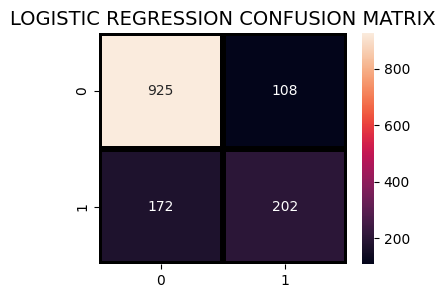

In [45]:
#Confusiin matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

Model 2 - AdaBoostClassifier

In [46]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy is : ",metrics.accuracy_score(y_test, a_preds))


AdaBoost Classifier accuracy is :  0.8109452736318408


In [47]:
print(classification_report(y_test, a_preds))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.67      0.57      0.62       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.75      1407
weighted avg       0.80      0.81      0.81      1407



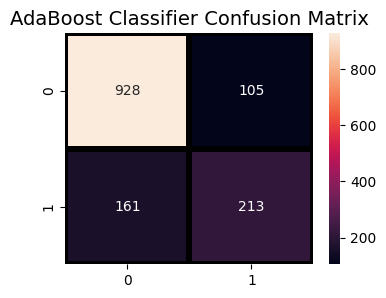

In [48]:
#Confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Model 3 - Gradient Boosting Classifier¶


In [49]:

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8038379530916845


In [50]:
print(classification_report(y_test, gb_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



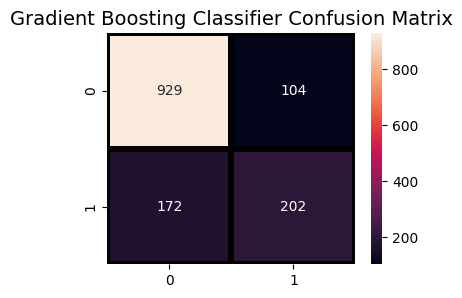

In [51]:
#Confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

Combining Model of  Model 1, Model 2 ,Model 3

In [52]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score is :- ")
print(accuracy_score(y_test, predictions))

c:\Users\VISHESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Final Accuracy Score is :- 
0.8052594171997157


In [53]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.60       374

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



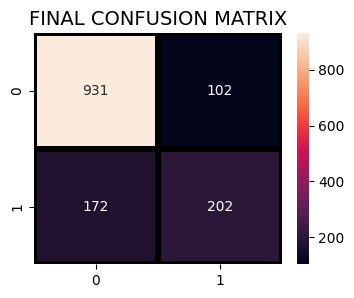

In [54]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

saving the model


In [55]:
import joblib

# Save the model to a file
joblib.dump(eclf1, 'model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [56]:
import numpy as np
import joblib

# Load the trained model
model = joblib.load('model.pkl')

# Create multiple sample customer data with an extra feature (defaulting to 0.0)
customer_data = np.array([
    [20, 45.0, 900.0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0.0],  # Customer 1
    [10, 60.0, 600.0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0.0],  # Customer 2
    [40, 2, 750.0, 1, 1800, 2700, 0, 1, 0, 4, 1, 250, 3, 0, 0, 1, 0, 1, 3, 1],
    [5, 30.0, 150.0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0.0]    # Customer 4
])  

# Ensure correct data type
customer_data = customer_data.astype(float)

# Predict churn probabilities for all customers
churn_probs = model.predict_proba(customer_data)[:, 1]

# Print probabilities and decisions
for i, prob in enumerate(churn_probs):
    print(f"Customer {i+1}: 🔮 Churn Probability = {prob:.4f}")
    if prob > 0.5:
        print("   🔴 Likely to churn.")
    else:
        print("   🟢 Not likely to churn.")


Customer 1: 🔮 Churn Probability = 0.6020
   🔴 Likely to churn.
Customer 2: 🔮 Churn Probability = 0.5493
   🔴 Likely to churn.
Customer 3: 🔮 Churn Probability = 0.3474
   🟢 Not likely to churn.
Customer 4: 🔮 Churn Probability = 0.6162
   🔴 Likely to churn.


c:\Users\VISHESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

c:\Users\VISHESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

c:\Users\VISHESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names

